<a href="https://colab.research.google.com/github/Gaya-2004/my-project/blob/main/kmeans_and_heirarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

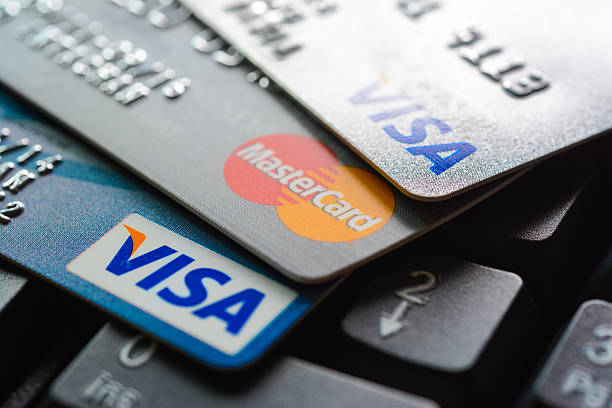

In [1]:
from IPython.display import display, Image
display(Image(filename='/content/credit card.jpg'))

In [2]:
#IMPORTING LIBRARY
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [6]:
#IMPORTING DATA
cdata = pd.read_csv('/content/credit_card_customer_data.csv')
cdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
# Data length and Breadth
cdata.shape

(660, 7)

In [8]:
# Data Info
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
# Data Type
cdata.dtypes

,0
Sl_No,int64
Customer Key,int64
Avg_Credit_Limit,int64
Total_Credit_Cards,int64
Total_visits_bank,int64
Total_visits_online,int64
Total_calls_made,int64


In [10]:
#Checking missing values
cdata.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [11]:
#Check for zeros
(cdata[:][:] == 0).sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,100
Total_visits_online,144
Total_calls_made,97


In [12]:
#Number of Unique data
cdata.nunique()

,0
Sl_No,660
Customer Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


In [13]:
#Number of negative values
(cdata[:][:] < 0).sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [14]:
#Describe Table
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [15]:
# Duplicate Check
cdata.duplicated().sum()

np.int64(0)

In [16]:
cdata = cdata.drop(['Sl_No','Customer Key'], axis=1)

AVG_CREDIT_LIMIT :


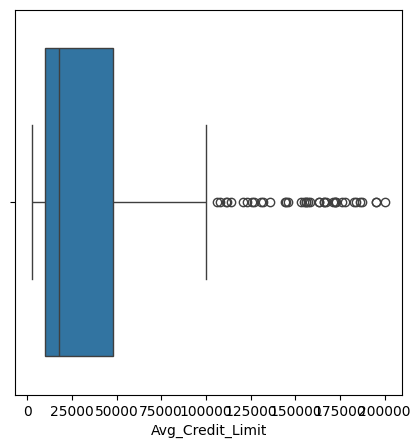

TOTAL_CREDIT_CARDS :


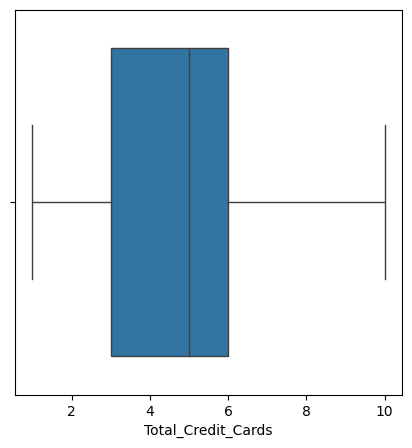

TOTAL_VISITS_BANK :


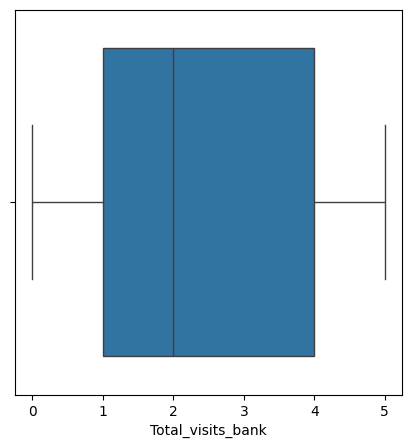

TOTAL_VISITS_ONLINE :


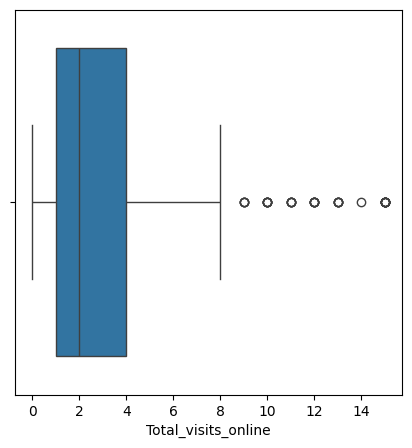

TOTAL_CALLS_MADE :


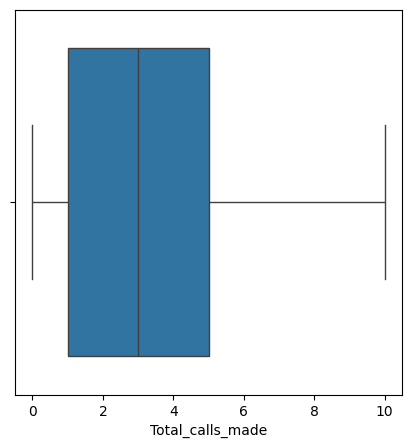

In [17]:
#Box plot to check outlier individual collumns
for i in cdata.columns:
    print(i.upper(),":")
    plt.figure(figsize=(5,5))
    sns.boxplot(x=cdata[i])
    plt.show()

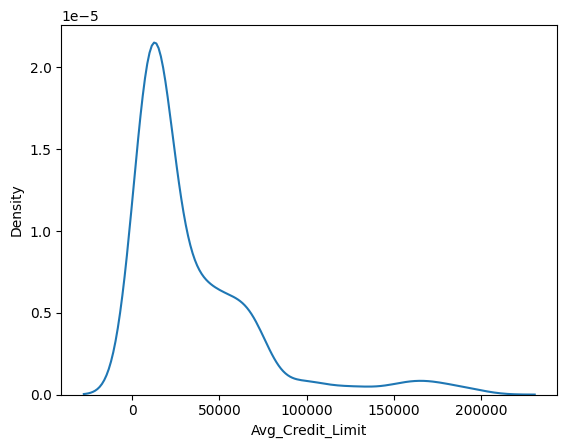

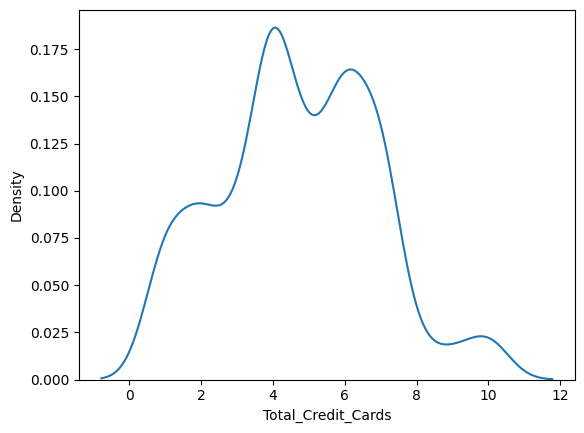

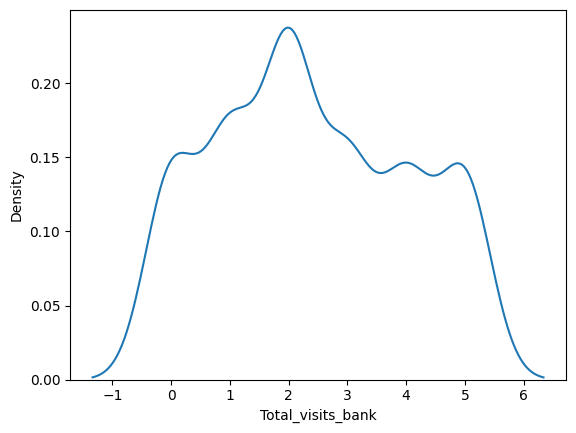

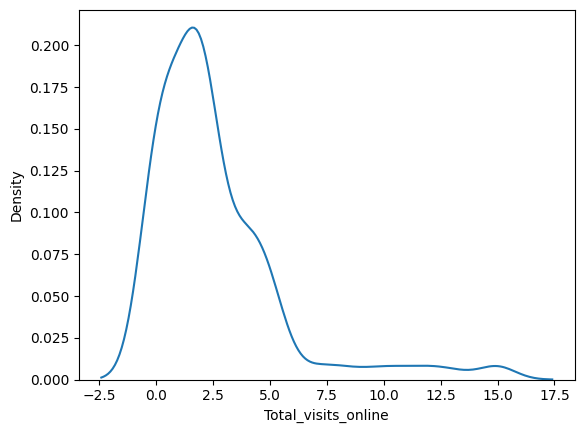

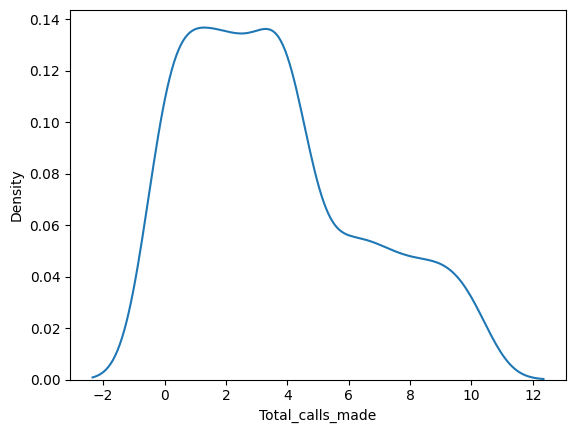

In [18]:
# Distplot for continous columns
for i in cdata.columns:
    sns.distplot(cdata[i],hist=False,)
    plt.show()

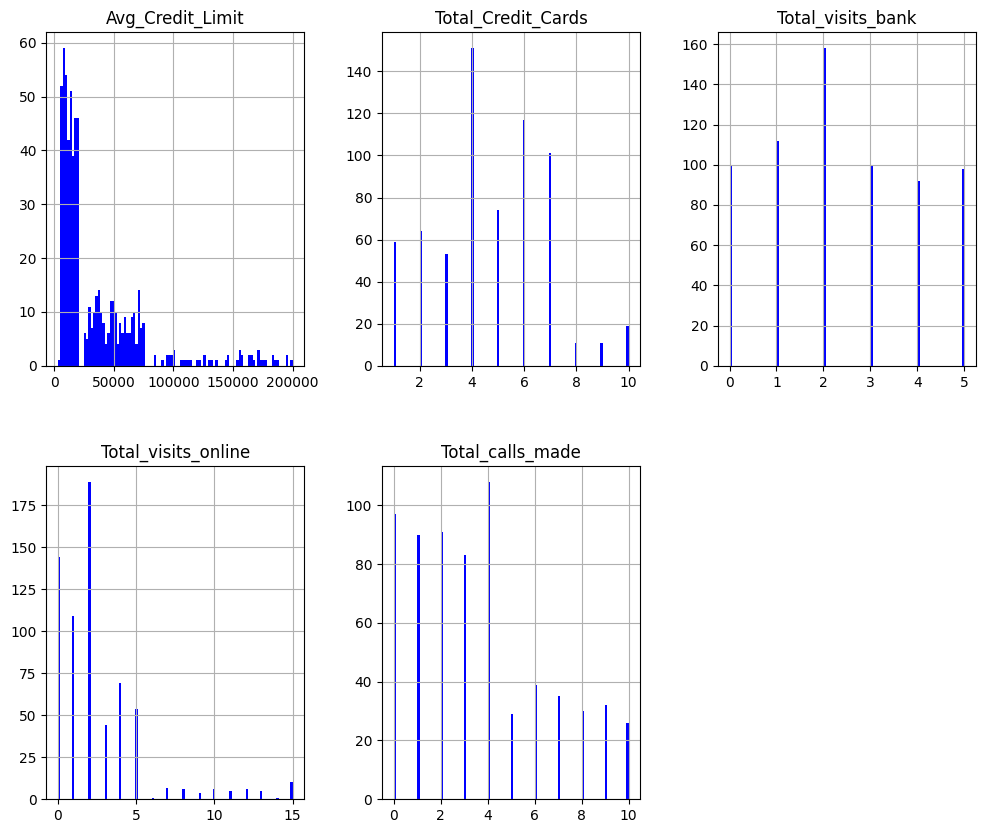

In [22]:
columns = list(cdata)[:]
cdata[columns].hist(stacked=False, bins=100, figsize=(12,55), layout=(10,3), color='blue');

In [23]:
# ##Value counts of all categorical columns.
for i in cdata.columns:
    k=cdata[i].value_counts(normalize=True)
    print('\n',i,'\n', k,'\n')


 Avg_Credit_Limit 
 Avg_Credit_Limit
8000      0.053030
6000      0.046970
9000      0.042424
13000     0.042424
19000     0.039394
            ...   
112000    0.001515
95000     0.001515
99000     0.001515
145000    0.001515
167000    0.001515
Name: proportion, Length: 110, dtype: float64 


 Total_Credit_Cards 
 Total_Credit_Cards
4     0.228788
6     0.177273
7     0.153030
5     0.112121
2     0.096970
1     0.089394
3     0.080303
10    0.028788
9     0.016667
8     0.016667
Name: proportion, dtype: float64 


 Total_visits_bank 
 Total_visits_bank
2    0.239394
1    0.169697
0    0.151515
3    0.151515
5    0.148485
4    0.139394
Name: proportion, dtype: float64 


 Total_visits_online 
 Total_visits_online
2     0.286364
0     0.218182
1     0.165152
4     0.104545
5     0.081818
3     0.066667
15    0.015152
7     0.010606
10    0.009091
12    0.009091
8     0.009091
11    0.007576
13    0.007576
9     0.006061
14    0.001515
6     0.001515
Name: proportion, dtype: float64 



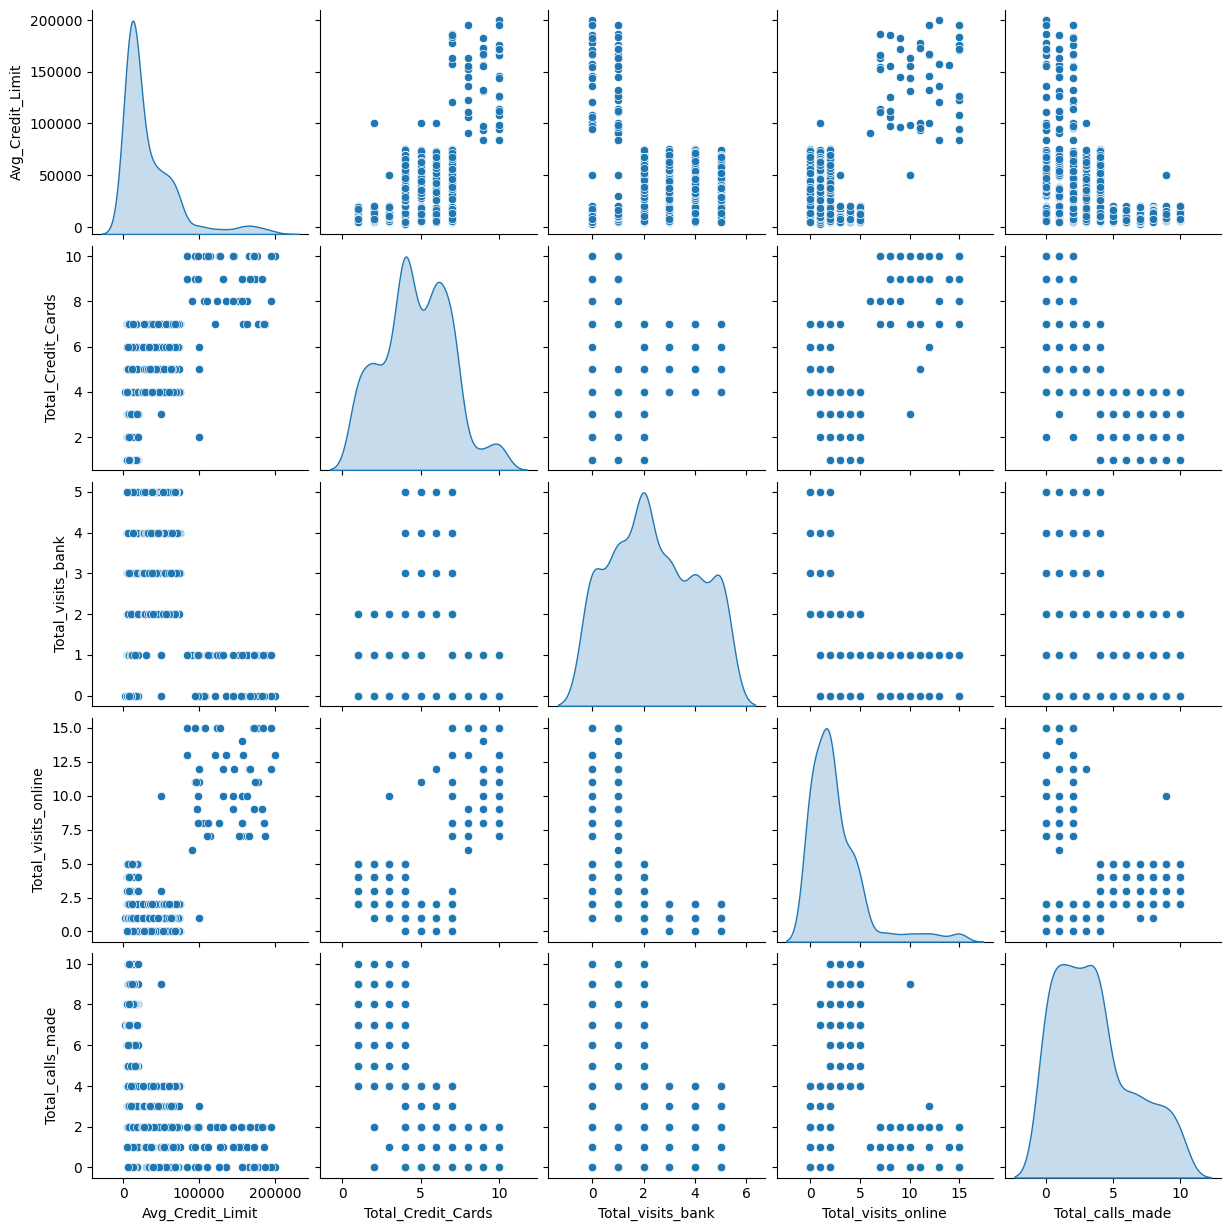

In [24]:
sns.pairplot(data=cdata,diag_kind='kde')

<Axes: >

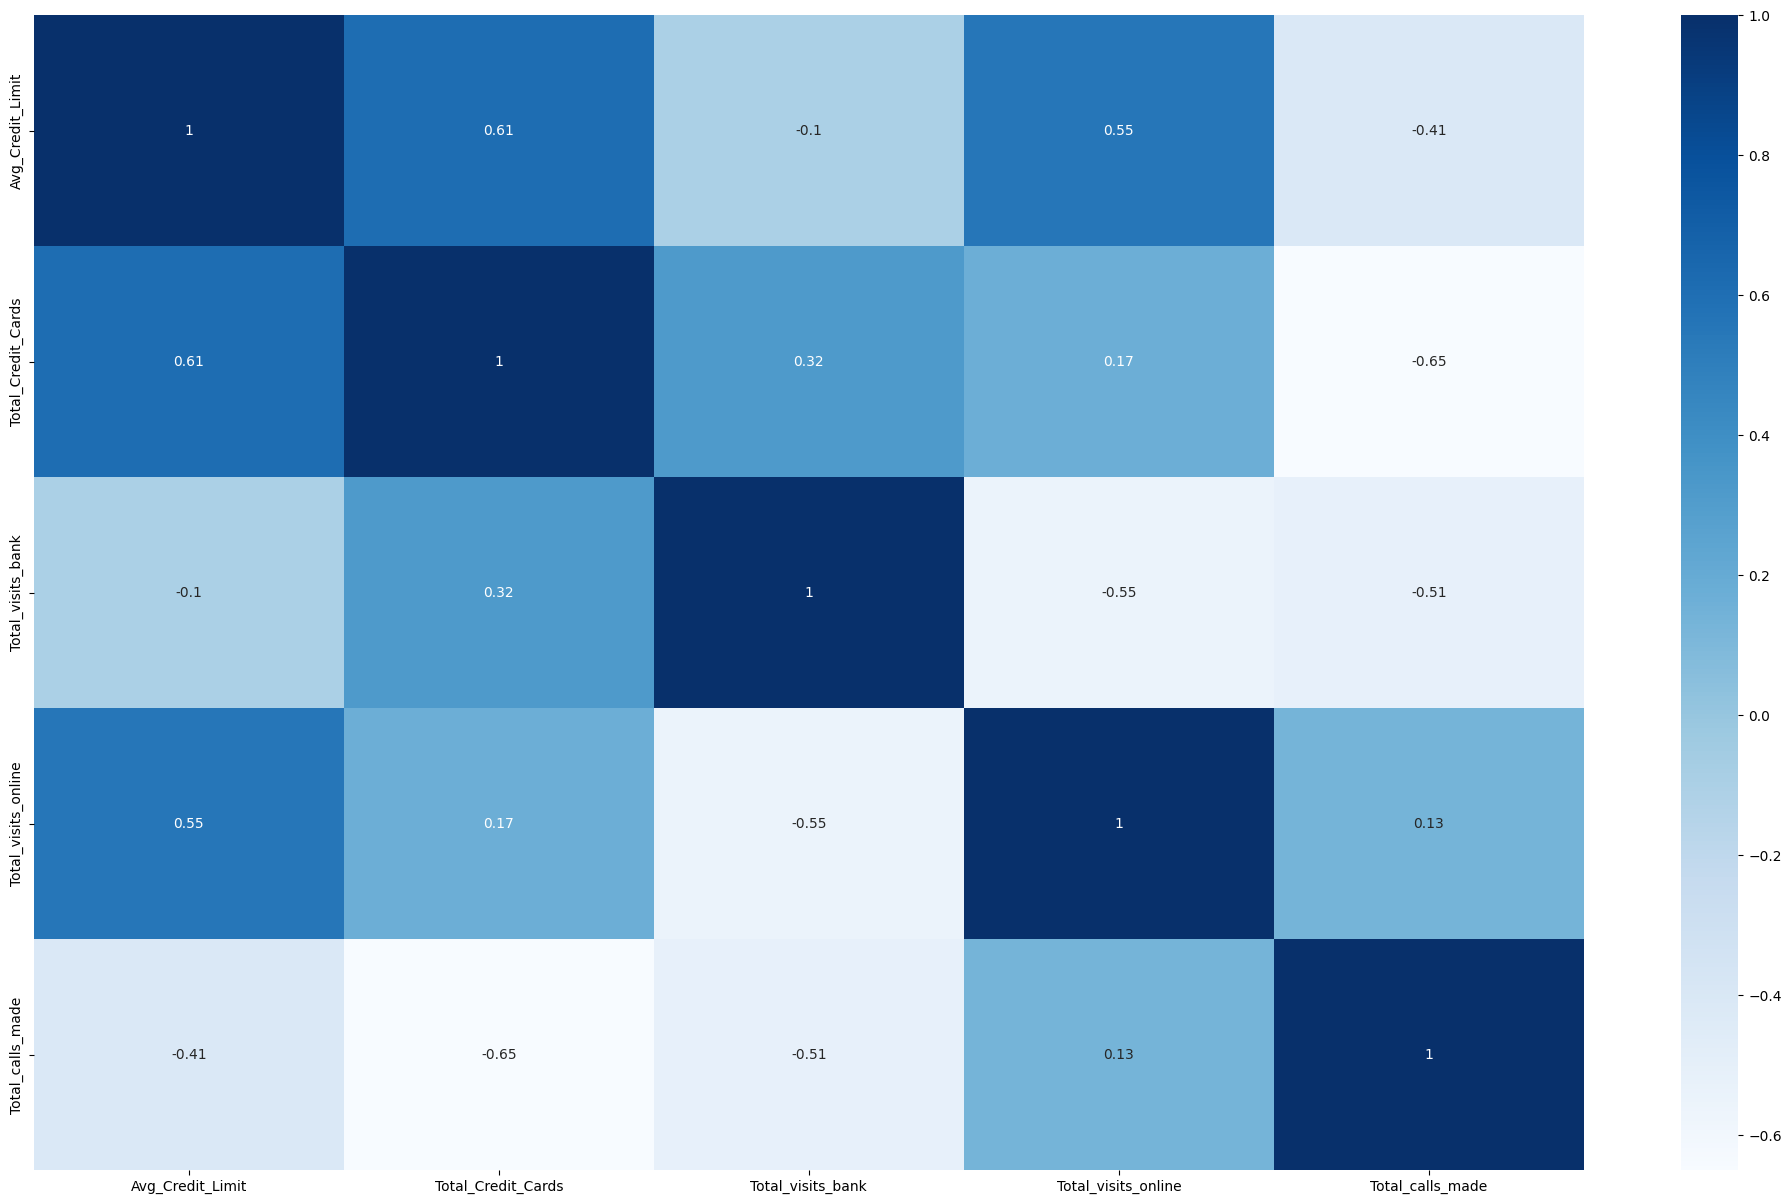

In [28]:
plt.figure (figsize = (25,15))
new = cdata.corr().round(2)
sns.heatmap(new, annot=True,cmap='Blues')

In [29]:
sdata=cdata.iloc[:,1:]
sdata=sdata.apply(zscore)

In [30]:
# Variables are mow scaled. Let us now try to create clusters

cluster_range = range(2,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(sdata)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1496.252484
1,3,753.338669
2,4,601.969733
3,5,526.821026
4,6,482.433750
5,7,449.480499
6,8,411.249948
7,9,375.833662


2 score  0.454
3 score  0.543
4 score  0.387
5 score  0.31
6 score  0.283
7 score  0.266
8 score  0.265
9 score  0.262


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

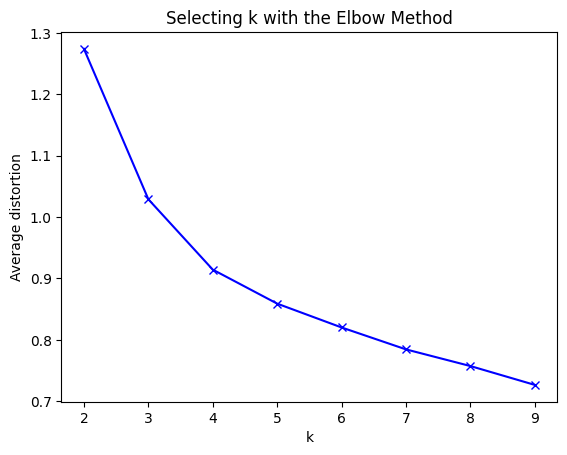

In [31]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(sdata)
    prediction=model.predict(sdata)
    meanDistortions.append(sum(np.min(cdist(sdata, model.cluster_centers_, 'euclidean'), axis=1)) / sdata.shape[0])
    s_score = silhouette_score(sdata,prediction)
    print(k,"score ",s_score.round(3))


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [32]:
# We could see the bend at 3 and 4
clusters=range(2,6)

for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init = 5, random_state=12345)
    kmeans.fit(sdata)
    # Check the number of data in each cluster
    labels = kmeans.labels_
    counts = np.bincount(labels[labels>=0])
    print("When K = ",k,counts)

When K =  2 [225 435]
When K =  3 [ 50 223 387]
When K =  4 [ 50 220 190 200]
When K =  5 [196 123 190  50 101]


In [33]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(sdata) )
centroid_df.transpose()

,0,1,2,3,4
Total_Credit_Cards,0.394778,-1.084085,0.356795,1.862226,-1.038973
Total_visits_bank,0.059470,-0.935241,1.295713,-1.105763,-0.866523
Total_visits_online,-0.561404,0.347692,-0.543901,2.827319,0.289547
Total_calls_made,-0.524493,1.681731,-0.575064,-0.874330,0.484420


In [34]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(sdata)
prediction=final_model.predict(sdata)

#Append the prediction
sdata["GROUP"] = prediction
cdata["GROUP"] = prediction
print("Groups Assigned : \n")
cdata.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


In [35]:
sdata['GROUP'].unique()

array([1, 0, 2], dtype=int32)

In [36]:
gdata = sdata.groupby(['GROUP'])
gdata.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,
0,-1.062913,-0.904453,0.325372,1.152605
1,0.371882,0.664034,-0.552775,-0.551200
2,1.862226,-1.105763,2.827319,-0.874330


array([[<Axes: title={'center': 'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Total_calls_made'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Total_visits_bank'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Total_visits_online'}, xlabel='[GROUP]'>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

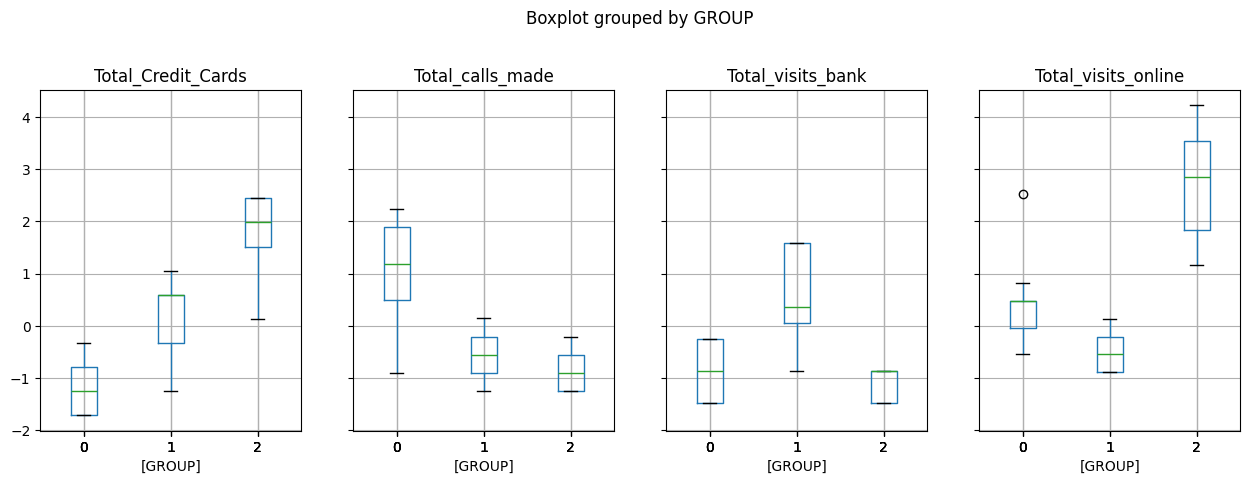

In [37]:
sdata.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [38]:
cdataG0 = cdata[cdata['GROUP']==0]
cdataG0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,223.0,12197.309417,5249.332169,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,223.0,2.403587,1.098068,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,223.0,0.928251,0.802171,0.0,0.0,1.0,2.0,2.0
Total_visits_online,223.0,3.560538,1.217242,1.0,2.5,4.0,4.0,10.0
Total_calls_made,223.0,6.883408,1.985271,1.0,5.0,7.0,9.0,10.0
GROUP,223.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [39]:
cdataG1 = cdata[cdata['GROUP']==1]
cdataG1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,387.0,33713.178295,22182.542428,5000.0,13000.0,31000.0,52000.0,100000.0
Total_Credit_Cards,387.0,5.511628,1.141195,2.0,4.0,6.0,6.0,7.0
Total_visits_bank,387.0,3.485788,1.136616,1.0,2.5,3.0,5.0,5.0
Total_visits_online,387.0,0.984496,0.857619,0.0,0.0,1.0,2.0,3.0
Total_calls_made,387.0,2.005168,1.432406,0.0,1.0,2.0,3.0,4.0
GROUP,387.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [40]:
cdataG2 = cdata[cdata['GROUP']==2]
cdataG2.describe().T


,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
GROUP,50.0,2.00,0.000000,2.0,2.0,2.0,2.0,2.0


The lower class, middle class and Elite class highly visible in the plot below for K = 3

 So the K = 3 is a good cluster


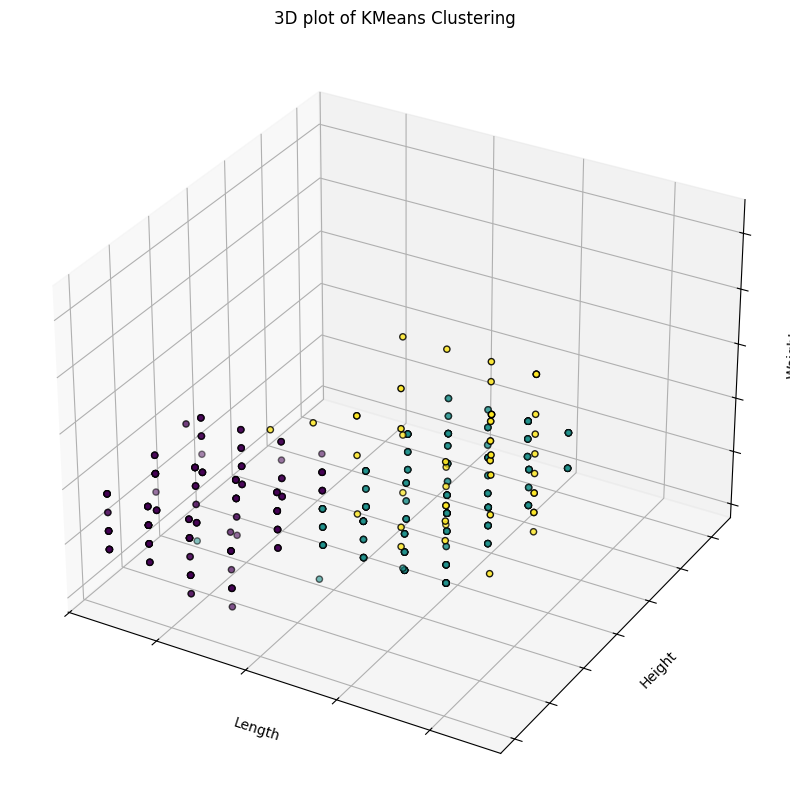

In [44]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') # Correct way to initialize Axes3D for newer matplotlib
k3_model=KMeans(3)
k3_model.fit(sdata)
labels = k3_model.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(float), edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class and Elite class highly visible in the plot below for K = 3")
print("\n","So the K = 3 is a good cluster")

In [45]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(sdata)
prediction=final_model.predict(sdata)

#Append the prediction
sdata["GROUP"] = prediction
cdata["GROUP"] = prediction
print("Groups Assigned : \n")
cdata.head()


Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,3
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


In [46]:
sdata['GROUP'].unique()

array([3, 2, 0, 1], dtype=int32)

In [47]:
gdata = sdata.groupby(['GROUP'])
gdata.mean()


,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,
0,0.512543,0.566364,-0.557925,-0.143152
1,1.862226,-1.105763,2.827319,-0.874330
2,-1.062913,-0.904453,0.325372,1.152605
3,0.227539,0.764260,-0.547490,-0.969930


In [48]:
gdata = cdata.groupby(['GROUP'])
gdata.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,34765.306122,5.816327,3.326531,0.969388,3.173469
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408
3,32633.507853,5.198953,3.649215,1.000000,0.806283


array([[<Axes: title={'center': 'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Total_calls_made'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Total_visits_bank'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Total_visits_online'}, xlabel='[GROUP]'>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

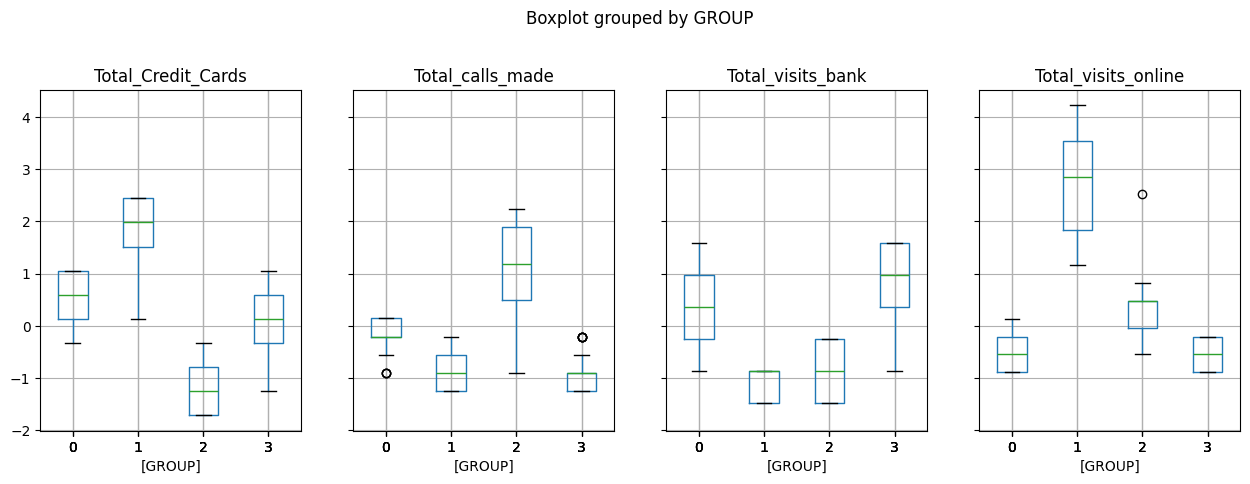

In [49]:
sdata.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [50]:
cdataG0 = cdata[cdata['GROUP']==0]
cdataG0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,196.0,34765.306122,22167.798785,5000.0,13750.0,35000.0,54000.0,75000.0
Total_Credit_Cards,196.0,5.816327,1.065515,4.0,5.0,6.0,7.0,7.0
Total_visits_bank,196.0,3.326531,1.130242,1.0,2.0,3.0,4.0,5.0
Total_visits_online,196.0,0.969388,0.870651,0.0,0.0,1.0,2.0,3.0
Total_calls_made,196.0,3.173469,0.791305,1.0,3.0,3.0,4.0,4.0
GROUP,196.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [51]:
cdataG1 = cdata[cdata['GROUP']==1]
cdataG1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
GROUP,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0


In [52]:
cdataG2 = cdata[cdata['GROUP']==2]
cdataG2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,223.0,12197.309417,5249.332169,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,223.0,2.403587,1.098068,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,223.0,0.928251,0.802171,0.0,0.0,1.0,2.0,2.0
Total_visits_online,223.0,3.560538,1.217242,1.0,2.5,4.0,4.0,10.0
Total_calls_made,223.0,6.883408,1.985271,1.0,5.0,7.0,9.0,10.0
GROUP,223.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [53]:
cdataG3 = cdata[cdata['GROUP']==3]
cdataG3.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,191.0,32633.507853,22203.881305,5000.0,13000.0,30000.0,50000.0,100000.0
Total_Credit_Cards,191.0,5.198953,1.134251,2.0,4.0,5.0,6.0,7.0
Total_visits_bank,191.0,3.649215,1.122725,1.0,3.0,4.0,5.0,5.0
Total_visits_online,191.0,1.000000,0.846043,0.0,0.0,1.0,2.0,2.0
Total_calls_made,191.0,0.806283,0.820245,0.0,0.0,1.0,1.0,3.0
GROUP,191.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


The lower class, middle class, upper middle class and Elite class highly visible in the plot below for K = 4

 So the K = 4 is a good cluster


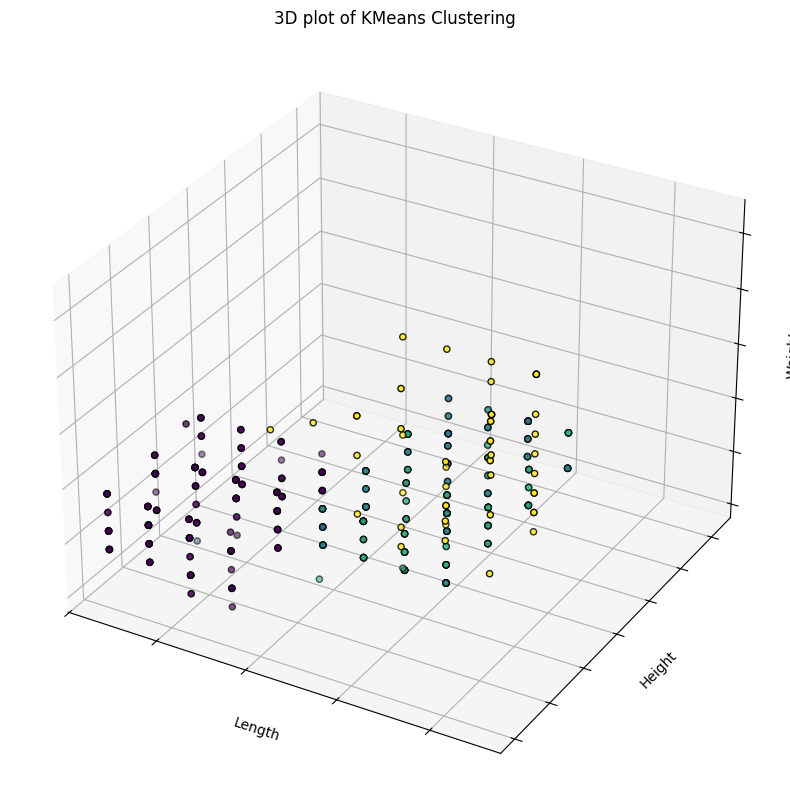

In [55]:
# Let us try with K = 4 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
k4_model=KMeans(4)
k4_model.fit(sdata)
labels = k4_model.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(float), edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class, upper middle class and Elite class highly visible in the plot below for K = 4")
print("\n","So the K = 4 is a good cluster")

The lower class is visible however upper middle class and Elite class looks combersome in the plot below for K = 5

 So the K = 5 is not a good cluster


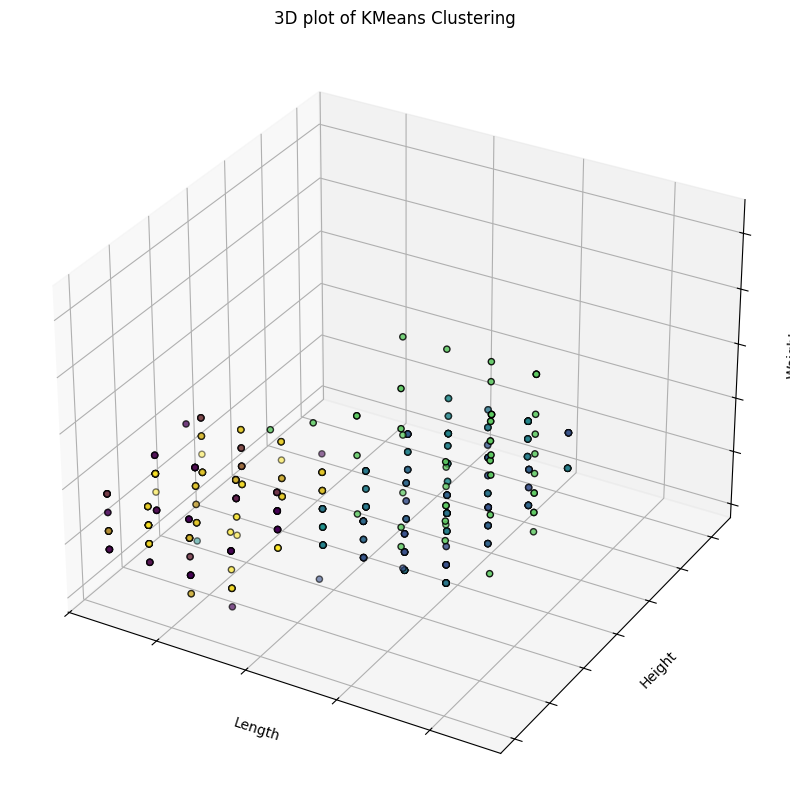

In [57]:
# Let us try with K = 5 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
k5_model=KMeans(5)
k5_model.fit(sdata)
labels = k5_model.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(float), edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class is visible however upper middle class and Elite class looks combersome in the plot below for K = 5")
print("\n","So the K = 5 is not a good cluster")

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(sdata, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [59]:
Z[:]

array([[ 263.        ,  490.        ,    0.        ,    2.        ],
       [ 436.        ,  570.        ,    0.        ,    2.        ],
       [ 302.        ,  323.        ,    0.        ,    2.        ],
       ...,
       [1312.        , 1313.        ,   37.45991177,  246.        ],
       [1314.        , 1316.        ,   44.75333241,  436.        ],
       [1315.        , 1317.        ,   48.75065868,  660.        ]])

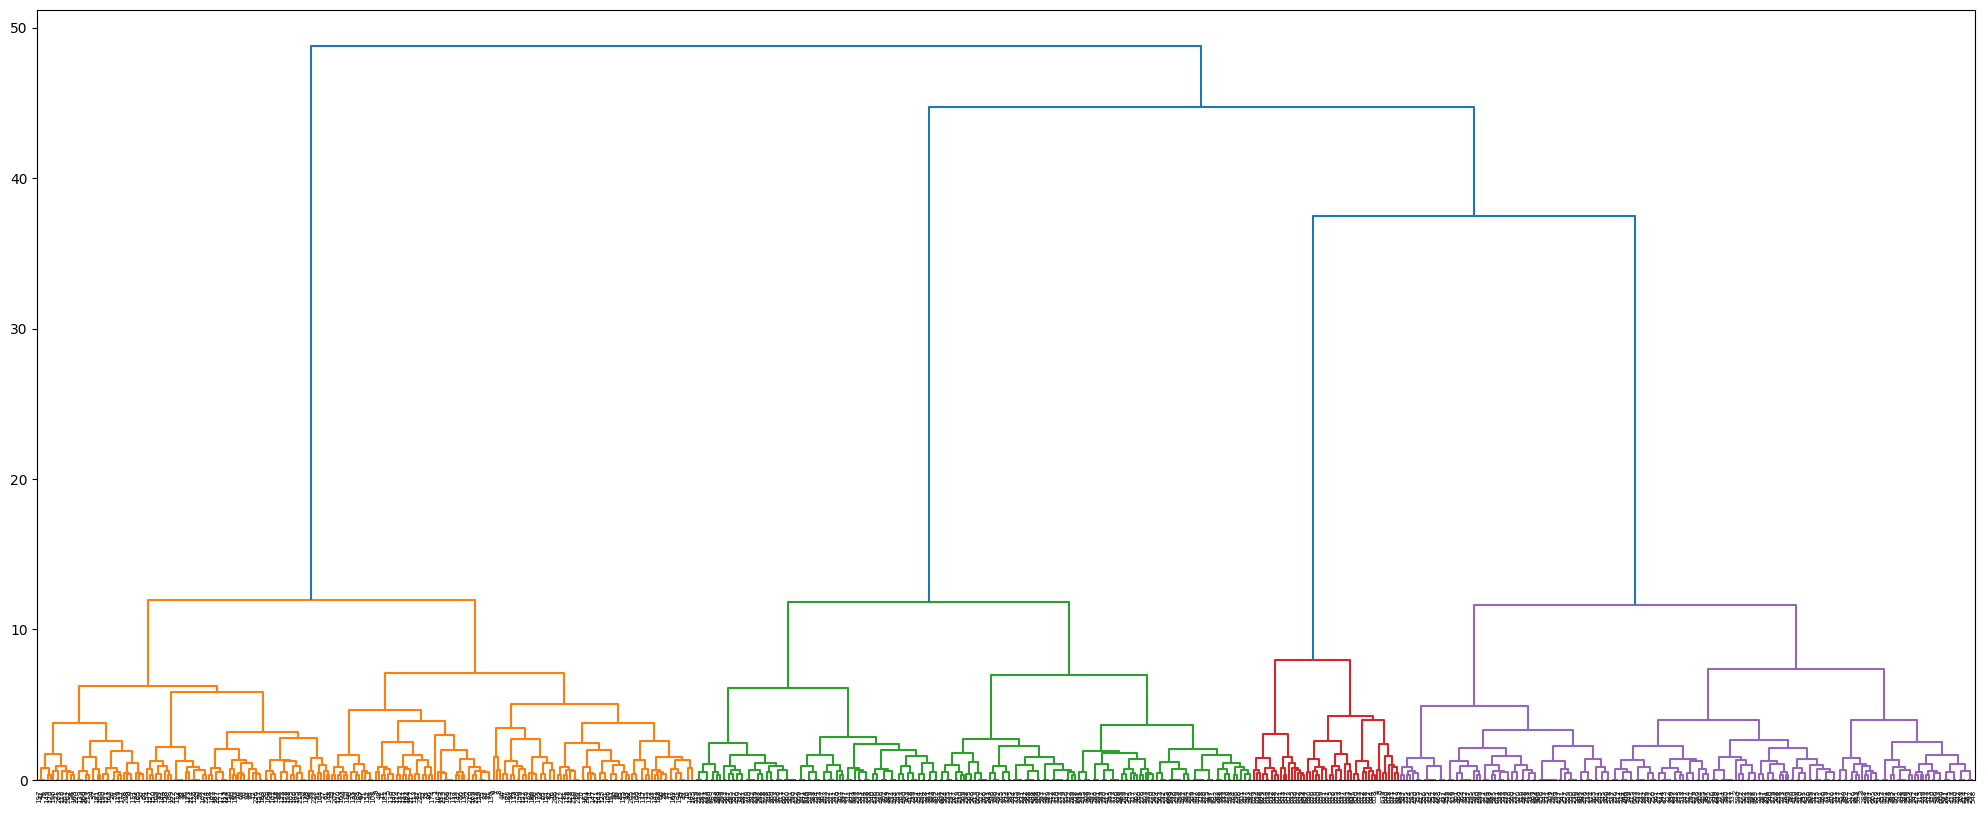

In [60]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

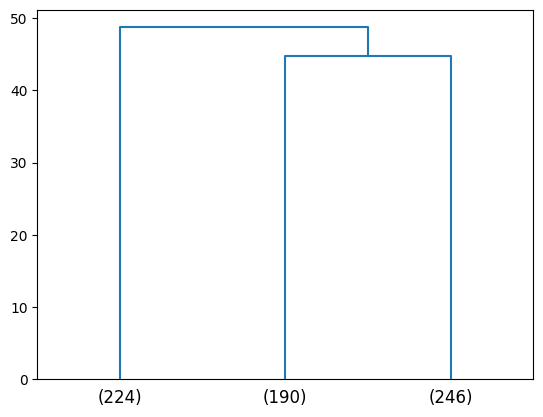

In [61]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(Z, truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

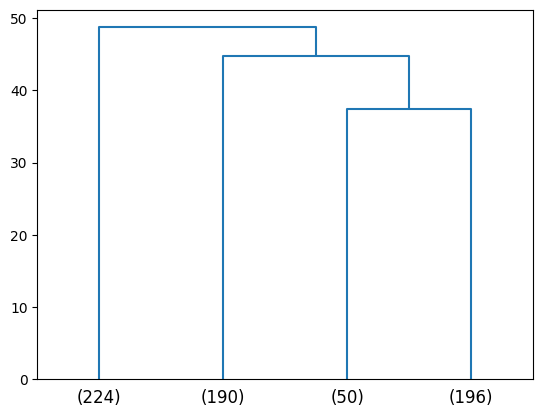

In [62]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(Z, truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
          )
plt.show()

In [64]:
import matplotlib.cm as cm

range_n_clusters= range(2,6)

for k in range_n_clusters:
    print("\n\n","Number of Clusters: ", k,"\n")

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    for link_ in ["ward", "complete", "average", "single"]:
      clusterer = AgglomerativeClustering(n_clusters=k, metric='euclidean',  linkage= link_)
      cluster_labels = clusterer.fit_predict(sdata)
      s_score = silhouette_score(sdata, cluster_labels)
      print(link_ + " -- silhouette_score is :", s_score.round(3))



 Number of Clusters:  2 

ward -- silhouette_score is : 0.363
complete -- silhouette_score is : 0.416
average -- silhouette_score is : 0.416
single -- silhouette_score is : 0.373


 Number of Clusters:  3 

ward -- silhouette_score is : 0.518
complete -- silhouette_score is : 0.441
average -- silhouette_score is : 0.442
single -- silhouette_score is : 0.43


 Number of Clusters:  4 

ward -- silhouette_score is : 0.604
complete -- silhouette_score is : 0.602
average -- silhouette_score is : 0.604
single -- silhouette_score is : 0.335


 Number of Clusters:  5 

ward -- silhouette_score is : 0.479
complete -- silhouette_score is : 0.514
average -- silhouette_score is : 0.549
single -- silhouette_score is : 0.55


In [67]:
Hmodel = AgglomerativeClustering(n_clusters=3, metric='euclidean',  linkage='ward')
Hmodel.fit(sdata)

AgglomerativeClustering(n_clusters=3)

In [69]:
hdata = sdata.copy()
hdata['labels'] = Hmodel.labels_
cdata['labels'] = Hmodel.labels_

cdata.head(10)

#custDataAttr.groupby(["labels"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,100000,2,1,1,0,3,1
1,50000,3,0,10,9,2,1
2,50000,7,1,3,4,0,0
3,30000,5,1,1,4,0,0
4,100000,6,0,12,3,1,0
5,20000,3,0,1,8,2,1
6,100000,5,0,11,2,1,0
7,15000,3,0,1,1,2,1
8,5000,2,0,2,2,2,1
9,3000,4,0,1,7,2,1


In [70]:
hdata_group = hdata.groupby(['labels'])
hdata_group.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
labels,,,,,
0,0.786869,0.226501,0.130133,-0.291765,0.203252
1,-1.063745,-0.904256,0.321475,1.141872,2.004464
2,0.235311,0.772811,-0.547490,-0.968448,3.000000


In [71]:
hdata['labels'].value_counts()

,count
labels,
0,246
1,224
2,190


In [75]:
hdata = sdata.drop(['GROUP'], axis=1)
hdata['labels'] = Hmodel.labels_ # Re-add the hierarchical labels to the hdata DataFrame

array([[<Axes: title={'center': 'Total_Credit_Cards'}, xlabel='[labels]'>,
        <Axes: title={'center': 'Total_calls_made'}, xlabel='[labels]'>,
        <Axes: title={'center': 'Total_visits_bank'}, xlabel='[labels]'>,
        <Axes: title={'center': 'Total_visits_online'}, xlabel='[labels]'>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

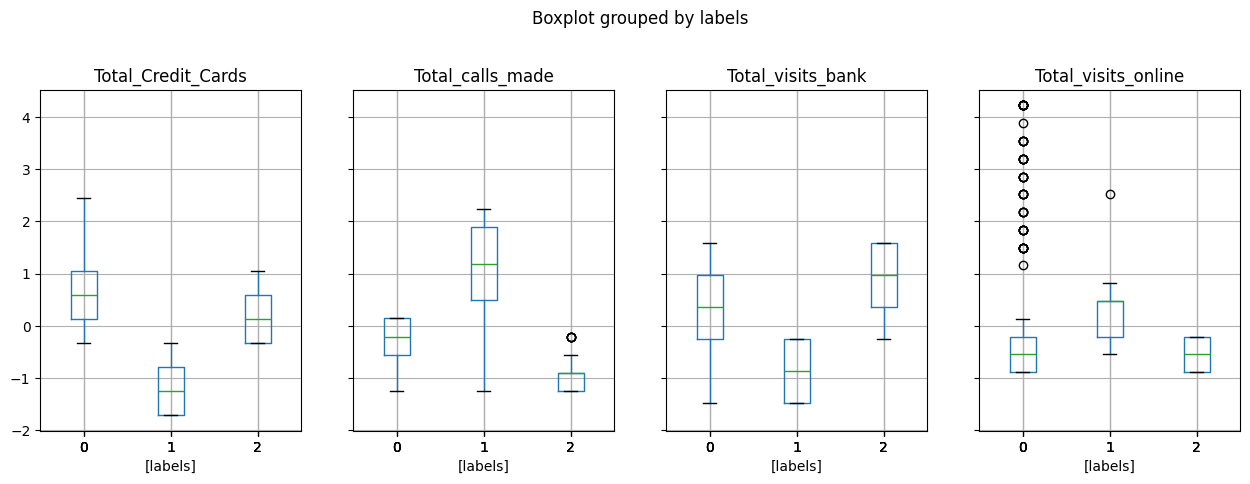

In [76]:
hdata.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [77]:
hdataG0 = cdata[cdata['labels']==0]
hdataG0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,246.0,56365.853659,49649.427034,5000.0,18000.0,42000.0,70000.0,200000.0
Total_Credit_Cards,246.0,6.410569,1.618178,4.0,5.0,6.0,7.0,10.0
Total_visits_bank,246.0,2.772358,1.508144,0.0,2.0,3.0,4.0,5.0
Total_visits_online,246.0,2.987805,4.277594,0.0,0.0,1.0,2.0,15.0
Total_calls_made,246.0,2.747967,1.168243,0.0,2.0,3.0,4.0,4.0
GROUP,246.0,0.203252,0.403239,0.0,0.0,0.0,0.0,1.0
labels,246.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [78]:
hdataG1 = cdata[cdata['labels']==1]
hdataG1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,224.0,12589.285714,7864.381384,3000.0,8000.0,12000.0,16000.0,100000.0
Total_Credit_Cards,224.0,2.401786,1.095935,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,224.0,0.928571,0.800384,0.0,0.0,1.0,2.0,2.0
Total_visits_online,224.0,3.549107,1.226501,1.0,2.0,4.0,4.0,10.0
Total_calls_made,224.0,6.852679,2.033507,0.0,5.0,7.0,9.0,10.0
GROUP,224.0,2.004464,0.066815,2.0,2.0,2.0,2.0,3.0
labels,224.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [79]:
hdataG2 = cdata[cdata['labels']==2]
hdataG2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,190.0,32278.947368,21713.650619,5000.0,13000.0,29500.0,50000.0,75000.0
Total_Credit_Cards,190.0,5.215789,1.113060,4.0,4.0,5.0,6.0,7.0
Total_visits_bank,190.0,3.663158,1.108987,2.0,3.0,4.0,5.0,5.0
Total_visits_online,190.0,1.000000,0.848279,0.0,0.0,1.0,2.0,2.0
Total_calls_made,190.0,0.810526,0.820308,0.0,0.0,1.0,1.0,3.0
GROUP,190.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
labels,190.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 3

 So the 3 clusters is appropriate


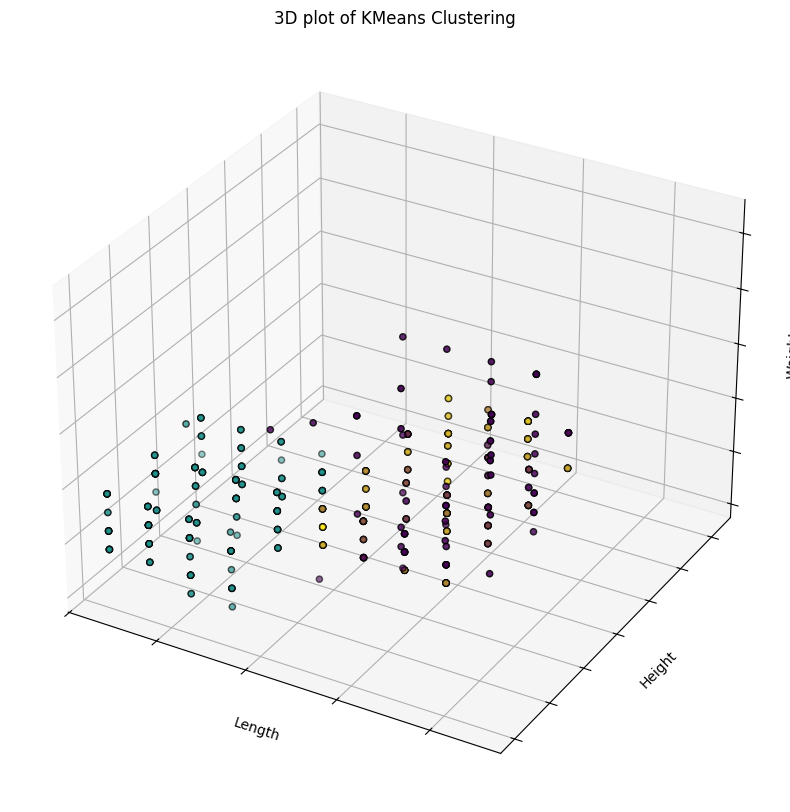

In [81]:
# Let us try with 3 clusters (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
Hmodel = AgglomerativeClustering(n_clusters=3, metric='euclidean',  linkage='ward')
Hmodel.fit(sdata)
labels = Hmodel.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(float), edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 3")
print("\n","So the 3 clusters is appropriate")

In [83]:
Hmodel = AgglomerativeClustering(n_clusters=4, metric='euclidean',  linkage='ward')
Hmodel.fit(sdata)

hdata['labels'] = Hmodel.labels_
cdata['labels'] = Hmodel.labels_

cdata.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,100000,2,1,1,0,3,0
1,50000,3,0,10,9,2,0
2,50000,7,1,3,4,0,1
3,30000,5,1,1,4,0,1
4,100000,6,0,12,3,1,3
5,20000,3,0,1,8,2,0
6,100000,5,0,11,2,1,3
7,15000,3,0,1,1,2,0
8,5000,2,0,2,2,2,0
9,3000,4,0,1,7,2,0


In [84]:
hdata_group = hdata.groupby(['labels'])
hdata_group.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,
0,-1.063745,-0.904256,0.321475,1.141872
1,0.512543,0.566364,-0.557925,-0.143152
2,0.235311,0.772811,-0.547490,-0.968448
3,1.862226,-1.105763,2.827319,-0.874330


In [85]:
hdata['labels'].value_counts()

,count
labels,
0,224
1,196
2,190
3,50


array([[<Axes: title={'center': 'Total_Credit_Cards'}, xlabel='[labels]'>,
        <Axes: title={'center': 'Total_calls_made'}, xlabel='[labels]'>,
        <Axes: title={'center': 'Total_visits_bank'}, xlabel='[labels]'>,
        <Axes: title={'center': 'Total_visits_online'}, xlabel='[labels]'>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

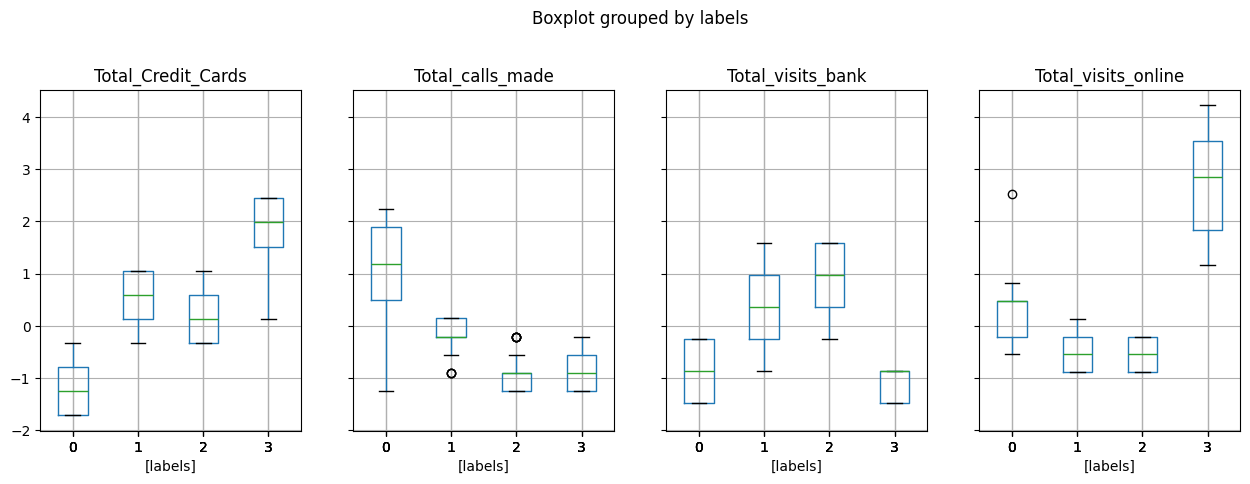

In [86]:
hdata.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [87]:
hdataG0 = cdata[cdata['labels']==0]
hdataG0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,224.0,12589.285714,7864.381384,3000.0,8000.0,12000.0,16000.0,100000.0
Total_Credit_Cards,224.0,2.401786,1.095935,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,224.0,0.928571,0.800384,0.0,0.0,1.0,2.0,2.0
Total_visits_online,224.0,3.549107,1.226501,1.0,2.0,4.0,4.0,10.0
Total_calls_made,224.0,6.852679,2.033507,0.0,5.0,7.0,9.0,10.0
GROUP,224.0,2.004464,0.066815,2.0,2.0,2.0,2.0,3.0
labels,224.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [88]:
hdataG1 = cdata[cdata['labels']==1]
hdataG1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,196.0,34765.306122,22167.798785,5000.0,13750.0,35000.0,54000.0,75000.0
Total_Credit_Cards,196.0,5.816327,1.065515,4.0,5.0,6.0,7.0,7.0
Total_visits_bank,196.0,3.326531,1.130242,1.0,2.0,3.0,4.0,5.0
Total_visits_online,196.0,0.969388,0.870651,0.0,0.0,1.0,2.0,3.0
Total_calls_made,196.0,3.173469,0.791305,1.0,3.0,3.0,4.0,4.0
GROUP,196.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
labels,196.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [89]:
hdataG2 = cdata[cdata['labels']==2]
hdataG2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,190.0,32278.947368,21713.650619,5000.0,13000.0,29500.0,50000.0,75000.0
Total_Credit_Cards,190.0,5.215789,1.113060,4.0,4.0,5.0,6.0,7.0
Total_visits_bank,190.0,3.663158,1.108987,2.0,3.0,4.0,5.0,5.0
Total_visits_online,190.0,1.000000,0.848279,0.0,0.0,1.0,2.0,2.0
Total_calls_made,190.0,0.810526,0.820308,0.0,0.0,1.0,1.0,3.0
GROUP,190.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
labels,190.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [90]:
hdataG3 = cdata[cdata['labels']==3]
hdataG3.describe().T


,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
GROUP,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
labels,50.0,3.00,0.000000,3.0,3.0,3.0,3.0,3.0


The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 4

 However - lower class and middle class - ploted at same plane - so 4 cluster is  not appropriate


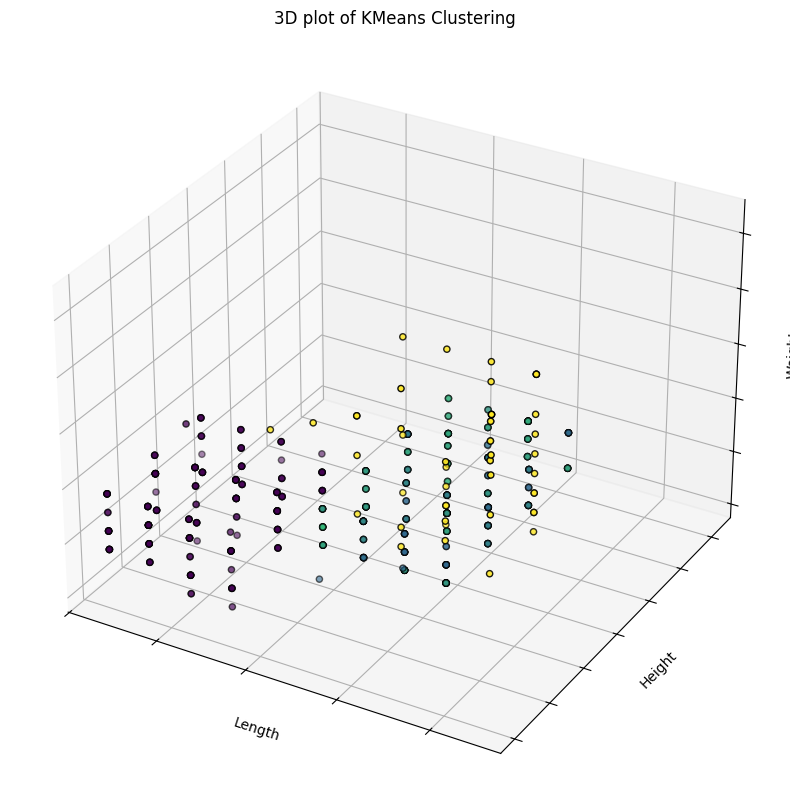

In [93]:
# Let us try with 4 clusters (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
Hmodel = AgglomerativeClustering(n_clusters=4, metric='euclidean',  linkage='ward')
Hmodel.fit(sdata)
labels = Hmodel.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(float), edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 4")
print("\n","However - lower class and middle class - ploted at same plane - so 4 cluster is  not appropriate")

The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 5

 However - lower class and middle class - ploted at same plane and upper middle class and elite class on the same plane, so 5 cluster is not appropriate


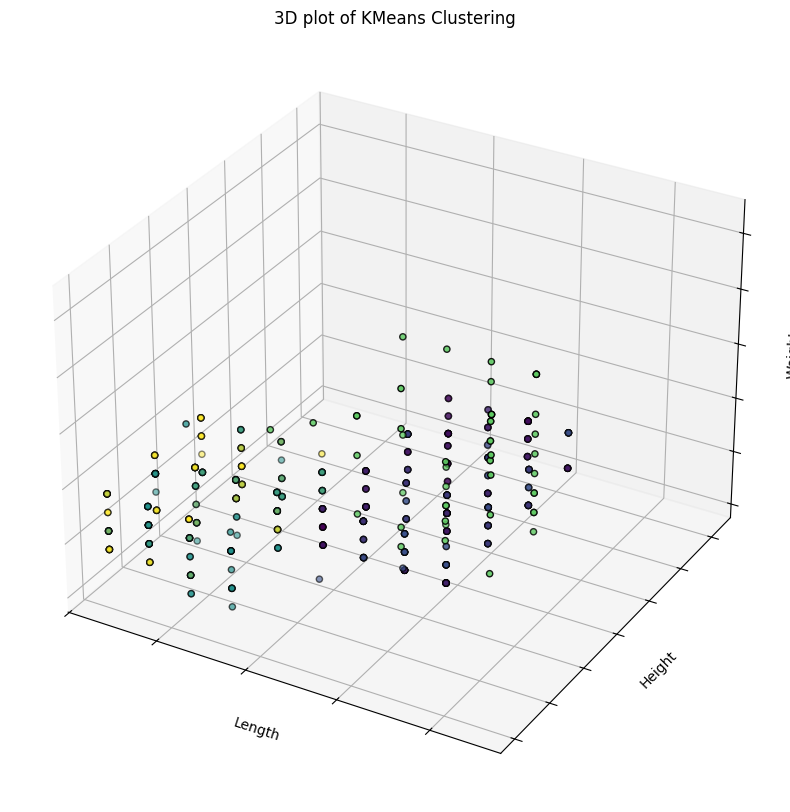

In [96]:
# Let us try with 5 clusters (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
Hmodel = AgglomerativeClustering(n_clusters=5, metric='euclidean',  linkage='ward')
Hmodel.fit(sdata)
labels = Hmodel.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(float), edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 5")
print("\n","However - lower class and middle class - ploted at same plane and upper middle class and elite class on the same plane, so 5 cluster is not appropriate")

In [97]:
max_d = 20
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 4, 4, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,
       2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2,

In [98]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(sdata,clusters).round(3)

np.float64(0.604)

In [99]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [100]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(sdata, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(sdata))

c.round(3)

np.float64(0.898)